In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import math

In [5]:
dataset= pd.read_csv(r"C:/Users/maris/OneDrive/Desktop/international-airline-passenger.csv")
dataset.head(10)

,"Month,passengers"""
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
Month,passengers"    144 non-null int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [7]:
dataset.head()

,"Month,passengers"""
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [8]:
dataset.tail(10)

,"Month,passengers"""
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


In [9]:
dataset.describe()

,"Month,passengers"""
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [14]:
#data = dataset.iloc[:,1].values

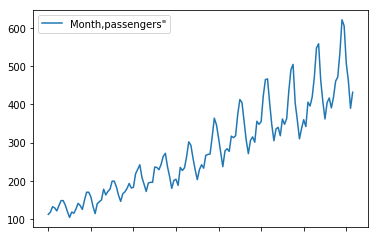

In [10]:
dataset.plot()

In [11]:
train_set = dataset.head(156)

In [12]:
test_set = dataset.tail(12)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
train_scaled = scaler.fit_transform(train_set)

C:\Users\maris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
test_scaled = scaler.transform(test_set)

In [18]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

In [19]:
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

In [20]:

X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [21]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [22]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [23]:

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [24]:

init = tf.global_variables_initializer()

In [25]:

saver = tf.train.Saver()

In [26]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [27]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.18084688
100 	MSE: 0.003083029
200 	MSE: 0.0008135657
300 	MSE: 0.005169197
400 	MSE: 0.0053376723
500 	MSE: 0.0010937767
600 	MSE: 0.0032639944
700 	MSE: 0.006410271
800 	MSE: 0.0049064644
900 	MSE: 0.0042235176
1000 	MSE: 0.005464385
1100 	MSE: 0.0011268927
1200 	MSE: 0.0044979644
1300 	MSE: 0.0010286729
1400 	MSE: 0.0035422954
1500 	MSE: 0.006773149
1600 	MSE: 0.001901701
1700 	MSE: 0.0031785676
1800 	MSE: 0.0056745745
1900 	MSE: 0.0014368288
2000 	MSE: 0.0012161859
2100 	MSE: 0.0007776502
2200 	MSE: 0.0027436102
2300 	MSE: 0.0018378249
2400 	MSE: 0.0017360385
2500 	MSE: 0.004706051
2600 	MSE: 0.003243386
2700 	MSE: 0.002609243
2800 	MSE: 0.0027082728
2900 	MSE: 0.0041846833
3000 	MSE: 0.0023232226
3100 	MSE: 0.0033103998
3200 	MSE: 0.0036780685
3300 	MSE: 0.0017573064
3400 	MSE: 0.003740577
3500 	MSE: 0.0045179036
3600 	MSE: 0.0032793793
3700 	MSE: 0.003079595
3800 	MSE: 0.003348769
3900 	MSE: 0.0030671097


In [28]:

test_set

,"Month,passengers"""
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461


In [29]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [30]:
train_seed

[array([0.6042471]),
 array([0.55405405]),
 array([0.60810811]),
 array([0.68918919]),
 array([0.71042471]),
 array([0.83204633]),
 array([1.]),
 array([0.96911197]),
 array([0.77992278]),
 array([0.68918919]),
 array([0.55212355]),
 array([0.63320463]),
 0.6005528,
 0.59847474,
 0.6093576,
 0.6420025,
 0.71073824,
 0.83887804,
 1.008511,
 0.91706985,
 0.66006994,
 0.54111034,
 0.5176473,
 0.56097466]

In [31]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [32]:

test_set['Generated'] = results

C:\Users\maris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
test_set

,"Month,passengers""",Generated
1960-01,417,415.086365
1960-02,391,414.009918
1960-03,419,419.647247
1960-04,461,436.557312
1960-05,472,472.162415
1960-06,535,538.538818
1960-07,622,626.408630
1960-08,606,579.042175
1960-09,508,445.916229
1960-10,461,384.295166


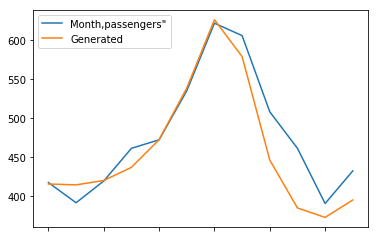

In [34]:
test_set.plot()